# Task 1

Hal pertama yang dilakukan adalah ektraksi dulu data dimana data ini berbentuk csv maka digunakan hal berikut


In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Proses ekstraksi data
link = 'https://raw.githubusercontent.com/nikhilsthorat03/Telco-Customer-Churn/main/telco.csv'

data_telco = pd.read_csv(
    link,
    na_values = ' '
)

# Atur penamaan kolom menjadi lowercase
data_telco.columns = data_telco.columns.str.lower()

# Hapus kolom yang tidak dibutuhkan
data_telco = data_telco.drop(['unnamed: 0'], axis=True)

# Tampilkan hasilnya
data_telco.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Stayed
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


1) Membuat diagram Donat/pie chart untuk menampilkan proporsi keseluruhan customer yang Stayed dan Churn!

In [ ]:
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# **Keterangan Kolom**


1. customerid → ID unik pelanggan  
2. gender → Jenis kelamin pelanggan (Male/Female).
3. seniorcitizen → Status lansia
3. partner → Apakah memiliki pasangan.
4. dependents → Apakah memiliki tanggungan keluarga
5. tenure → Lama berlangganan.
6. phoneservice → Apakah memiliki layanan telepon.
7. multiplelines → Apakah memiliki lebih dari satu jalur telepon.
8. internetservice → Jenis layanan internet.
9. onlinesecurity, onlinebackup, deviceprotection, techsupport → Layanan tambahan internet.
10. streamingtv, streamingmovies → Layanan streaming yang digunakan.
11. contract → Jenis kontrak.
12. paperlessbilling → Apakah menggunakan tagihan tanpa kerta.
13. paymentmethod → Metode pembayaran.
14. monthlycharges → Biaya langganan per bulan (USD).
15. totalcharges → Total biaya yang telah dibayarkan (USD).
16. churn → Status berhenti berlangganan



In [ ]:
# Buat agregasi terlebih dahulu
proporsi_stayed_churn = data_telco.groupby(['churn'], as_index=False).agg(total = ('churn','count'))

# Tampilkan data
display(proporsi_stayed_churn)

,churn,total
0,Churned,1869
1,Stayed,5174


In [ ]:
# Menghitung total keseluruhan kolom churn
data_telco.agg(total_keseluruhan = ('churn','count'))

,churn
total_Keseluruhan,7043


In [ ]:
#Membuat pic chart
# Import library untuk visualisasi
import plotly.express as px

# Hitung total data
total_data = data_telco.agg(total = ('churn','count'))

# Warna
hijau_pucat = '#E0ECE4'
merah = '#FF4B5C'

# Buat pie chart
fig = px.pie(
    values =proporsi_stayed_churn['total'],
    names =proporsi_stayed_churn['churn'],
    color_discrete_sequence = [hijau_pucat, merah],
    hole = 0.65
)

# Atur posisi label
fig.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label',
    hovertemplate='<b>%{label}</b><br>%{value} Customers'
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = (
          "Proposi Status Pelanggan Perusahaan Telco<br>"
            "<span style='font-size: 16px; color: red;'>"
            "Lebih dari seperempat customer telah berhenti berlangganan"
            "</span>"
            ),
        font = dict(
            size = 22,
            color = '#757882'
        ),
        y = 0.92,
        x = 0.10,

    )
)

# Berikan informasi total pelanggan di tengah donut chart
fig.add_annotation(
    text = f'<br><b><span style="font-size: 23px;">{total_data}</b></span>',
    x = 0.5,
    y = 0.5,
    showarrow = False,
    font = dict(size = 20),

    align = "center",
    xref = "paper",
    yref = "paper"
)


# Tampilkan grafik
fig.show()

![images.jpeg](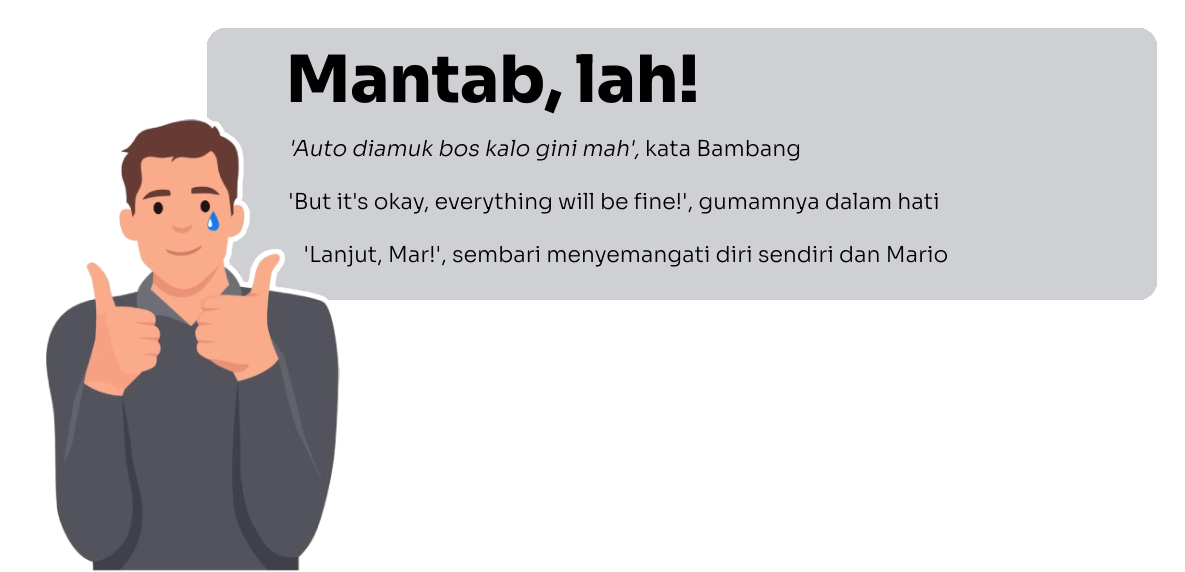)

# Insight Task 1:
Dari 7043 pelanggan dari perusahaan telco ditemukan 26.5% pelanggan menyandang status Churned atau sekitar 1869 pelanggan telah menghentikan layanan telekomunikasi di perusahaan tersebut. Terbilang cukup besar, sehingga perlu dilakukan analisa lebih lanjut untuk mengetahui faktor apa saja yang mungkin menyebabkan banyaknya pelanggan memutuskan untuk menghentikan layanan



# Task 2 - Statistika Deskriptif
Menampilkan perhitungan statistika deskriptif semua kolom numerik pada DataFrame data_telco


In [ ]:
# Filter kolom numerik saja pada data telco
number_data = data_telco.select_dtypes(include=['number'])


# Hitung statistik deskriptif pada data
statistics = pd.DataFrame({
    'mean' : number_data.mean(),
    'median':number_data.median() ,
    'modus': number_data.mode().iloc[0],
    'min': number_data.min(),
    'max': number_data.max(),
    'q1' : number_data.quantile(0.25),
    'q2' : number_data.quantile(0.50),
    'q3' : number_data.quantile(0.75),
    'stdev' : number_data.std()
})


# Tampilkan hasilnya
display(statistics.round(2))

,mean,median,modus,min,max,q1,q2,q3,stdev
tenure,32.37,29.00,1.00,0.00,72.00,9.00,29.00,55.00,24.56
monthlycharges,64.76,70.35,20.05,18.25,118.75,35.50,70.35,89.85,30.09
totalcharges,2283.30,1397.48,20.20,18.80,8684.80,401.45,1397.48,3794.74,2266.77


# **INSIGHT - TASK 2**  


### 1.   Tenure
      

*   Banyak pelanggan yang baru mendaftar dengan dibuktikan dengan modus nya sebesar 1 bulan


*   Terdapat pelanggan yang bertahan lama hingga 72 bulan (6 tahun), yang menunjukkan bahwa sebagian pelanggan setia.


### 2. Monthlycharges

*   Pada modus sebesar 20.5 Menunjukkan paket murah paling banyak digunakan.

*   Rentang harga  antara $18.25 - $118.75, menandakan ada berbagai jenis paket layanan.

*   Stdev tinggi (30.09) menunjukkan bahwa biaya langganan pelanggan sangat bervariasi, mungkin tergantung pada fitur tambahan.













# **Task 3 - Periksa Outlier!**




> ### *Adakah outlier pada DataFrame `data_telco`? Gunakan grafik boxplot untuk menunjukkan ada-tidaknya outlier pada data!*

# **Task 4 - Ada duplikat?**

> ### *Selanjutnya periksa pada DataFrame `data_telco` tentang duplikasi data pada kolom `customerid` ? Jika ditemukan, mengapa hal tersebut terjadi dan apa yang sebaiknya dilakukan?*

In [ ]:
data_telco.duplicated(subset='customerid', keep=False).sum()

0

## **Insight - Task 4**  
Berdasarkan pencarian mengenai duplikasi data pada kolom customerid, maka tidak ditemukan adanya data yang duplikat sehingga data dapat digunakan untuk analisis lebih lanjut tanpa perlu pembersihan terkait duplikasi.

# **Task 5 - Missing Value, anyone?**

> ### *Next periksa pada DataFrame `data_telco` tentang missing value data pada semua kolom ? Jika ditemukan, mengapa hal tersebut terjadi dan apa yang sebaiknya dilakukan?*

In [ ]:
# memeriksa missing value
print(data_telco.isnull().sum())

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64


## **Insight - Task 5**

Berdasarkan pencarian missing value pada data telco ditemukan 11 missing value pada kolom totalcharges, sementara pada kolom lainnya tidak ditemukan missing value

# **Task 6 - Distribusi Monthly Charges**

> ### *Pak Bambang ingin melihat distribusi awal seluruh Monthly Charges pada customer. Tampilkan histogram kolom Monthly Charges pada DataFrame `data_telco`*

In [ ]:
import plotly.express as px

fig = px.histogram(
    data_telco,
    x = 'monthlycharges',
    marginal = 'box',
    color_discrete_sequence  = ['#0E2954'],
    nbins = 50
)

fig.update_traces(
      marker_line_width = 1,
      marker_line_color = 'white'
)

fig.update_layout(
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    title = dict(
        text = "<b>Distribusi <span style='color:#0E2954'>Monthly Charges</b> Pelanggan<br><sup><sup>Perusahaan Telekomunikasi</sup></sup>",
        font = dict(
            size = 28,
            color = '#757882'
        ),
        y = 0.92,
        x = 0.5
    ),
    yaxis = dict(
        title = 'Jumlah Data',
        showgrid = False,
        showline = False,
        showticklabels = False,
        zeroline = False,
    ),
    margin = dict(
        t = 80,
        b = 10,
        r = 20
    )
)

fig.show()

## **Insight - Task 6**

Berdasarkan hasil visualisasi histogram monthly charges (biaya langganan bulanan), dapat dilihat bahwa distribusi pelanggan tidak merata. Sebagian besar pelanggan membayar biaya langganan yang relatif rendah, terutama di kisaran $20 - $30, sementara kelompok lainnya tersebar dalam rentang $40 - $100 dengan distribusi yang lebih merata.